## Las Conjeturas de Reconstrucción
_Uno de los problemas más importantes en Teoría de Gráficas_

---

**Definición.** Dada una gráfica $G$, la colección de todos las subgráficas de la forma $G - v$ para $v \in V(G)$ se le conoce como _deck_ (¿baraja?, ¿mazo?) de $G$ y se denota por $\mathcal D(G)$.

A las gráficas del deck se les conoce como _cartas_. Si dos subgráficas de la forma $G-v$ son isomorfas, entonces estas aparecen _repetidas_ en $\mathcal D(G)$.

$\mathcal D(G)$ **no** es un conjunto.

**Pregunta**: Si $\mathcal D(H) = \mathcal D(G)$, entonces ¿las gráficas $G$ y $H$ son isomorfas?

- Una gráfica $H$ tal que $\mathcal D(H) = \mathcal D(G)$ se dice que es una _reconstrucción_ de $G$. 

- Si toda reconstrucción de $G$ es es isomorfa a $G$, entonces decimos que $G$ _es reconstruible_.

**Ejemplo**: Considere $G = K_2$ y $H = K_1 + K_1$. Note que $H$ es una reconstrucción de $G$, pero $G$ y $H$ no son isomorfas. Por tanto $G$ (y por tanto $H$) es no reconstruible.  

La **Conjetura de Reconstrucción** afirma que este es el único ejemplo de una gráfica no reconstruible.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def deck(G):
    deck = []
    for node in G:
        nodes = list(G)
        nodes.remove(node)
        deck.append(G.subgraph(nodes))
    return deck

def factor_int(n):
    val = math.ceil(math.sqrt(n))
    val2 = int(n/val)
    while val2 * val != float(n):
        val -= 1
        val2 = int(n/val)
    return val, val2

def draw_graph(G):
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, node_size=100,
            node_color="black", width=1.5, )
    plt.show()
    

def draw_deck(deck):
    i, j = factor_int(len(deck))
    fig, all_axes = plt.subplots(i, j, figsize=(16,8))
    ax = all_axes.flat
    for i, G in enumerate(deck):
        pos = nx.kamada_kawai_layout(G)
        nx.draw(G, pos, ax=ax[i], node_size=100,
                node_color="black", width=1.5)
    plt.show()
    

def edge_deck(G):
    edge_deck = []
    for u,v in G.edges:
        tmp = G.copy()
        tmp.remove_edge(u,v)
        edge_deck.append(tmp)
    return edge_deck

**Conjetura de reconstrucción.** Toda gráfica con al menos tres vértices es reconstruible. 

> Una gráfica $G$ es reconstruible si $\mathcal D(G)$ nos provee de suficiente información para determinar a $G$.

Observe que el problema **no** trata de encontrar un algoritmo eficiente para reconstruir $G$ a partir de $\mathcal D(G)$. El problema trata sobre si tal algoritmo nos regresa resultados únicos para un deck dado. 

G


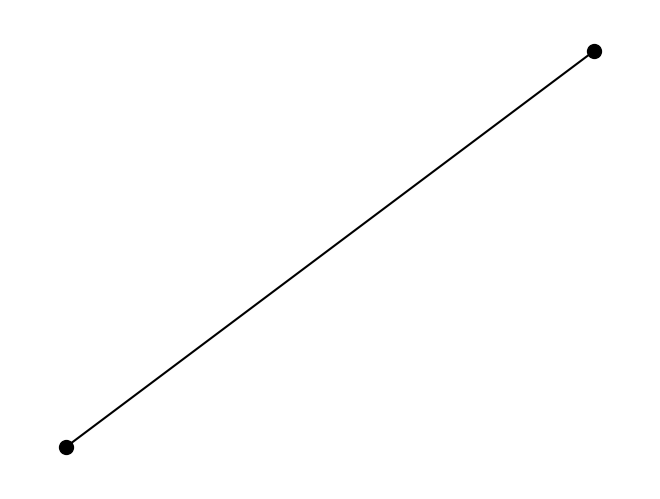

H


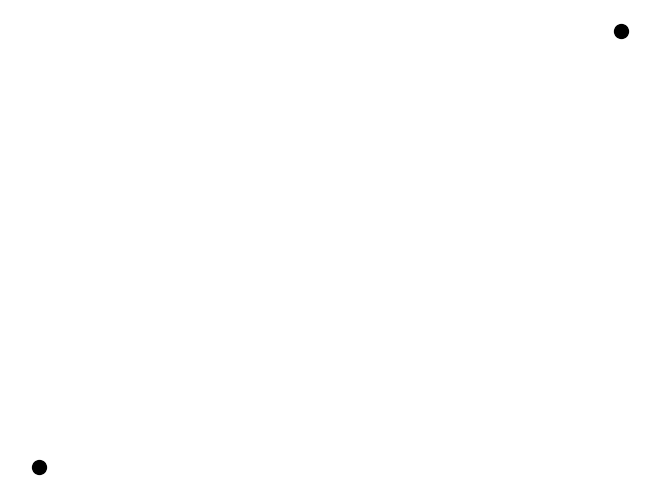

In [5]:
G = nx.complete_graph(2)
H = nx.Graph()
H.add_nodes_from([1,2])
print('G')
draw_graph(G)
print('H')
draw_graph(H)

- De manera similar, podemos definir el _deck de aristas_ de $G$, denotado por $\mathcal{ED}(G)$, como la colección de todas las subgráficas de la forma $G-e$ para $e \in E(G)$. 

- Una _reconstrucción-por-aristas_ de $G$, es una gráfica $H$ tal que $\mathcal{ED}(G) = \mathcal{ED}(H)$. 

- Decimos que $G$ es _reconstruible por aristas_ si toda reconstrucción por aristas de $G$ es isomorfa a $G$.

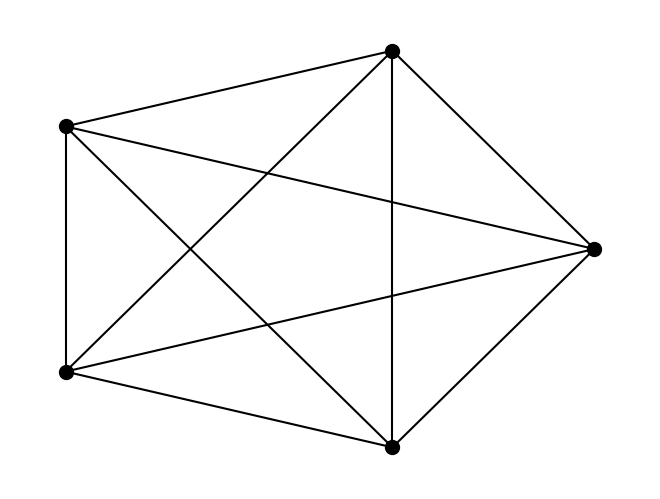

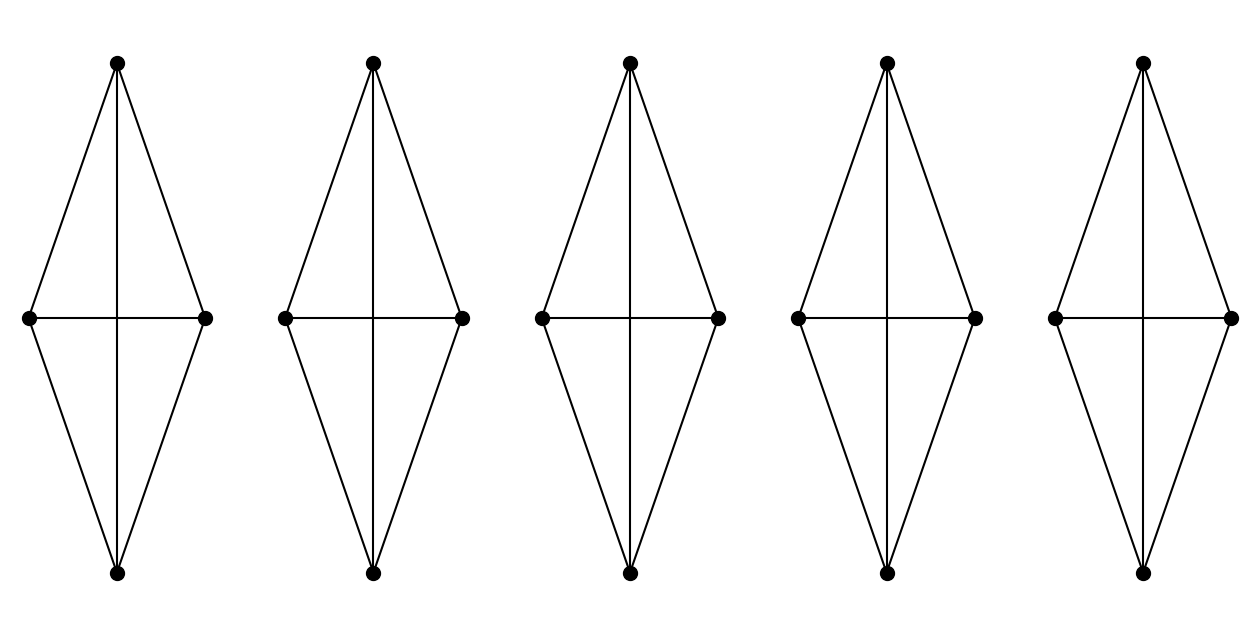

In [7]:
K = nx.complete_graph(5)
deck_K = deck(K)
draw_graph(K)
draw_deck(deck_K)

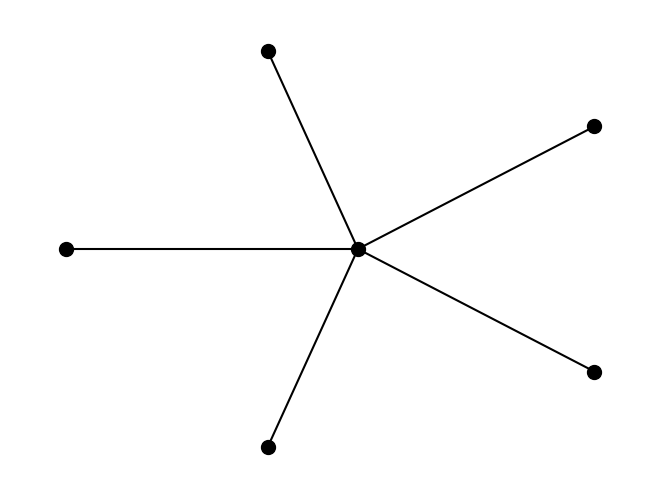

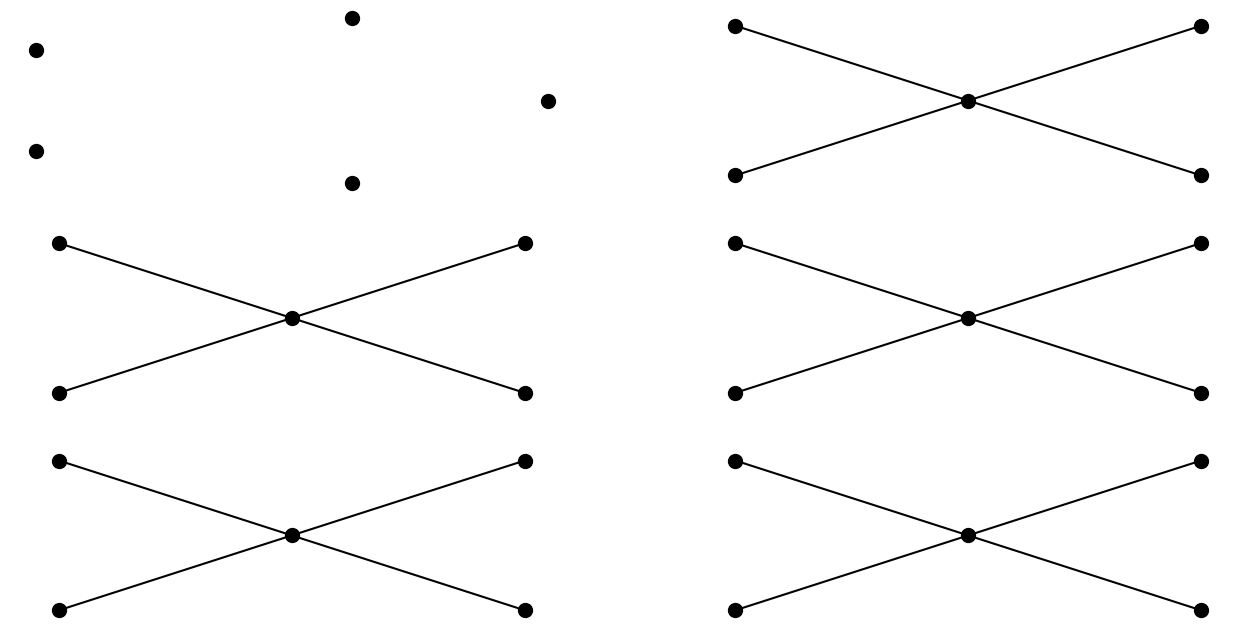

In [8]:
S = nx.star_graph(5)
deck_S = deck(S)
draw_graph(S)
draw_deck(deck_S)

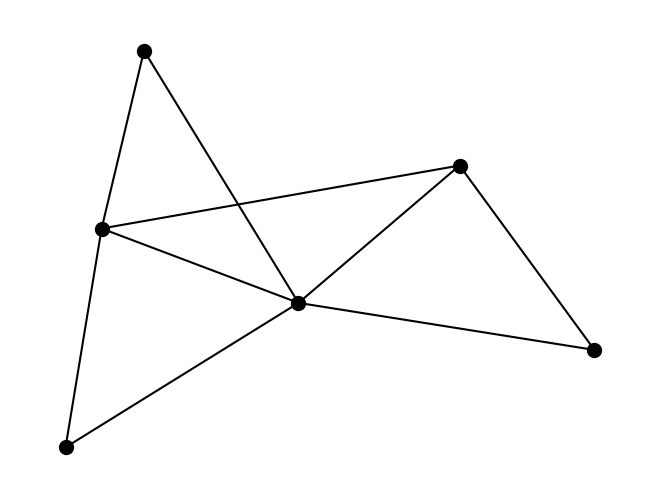

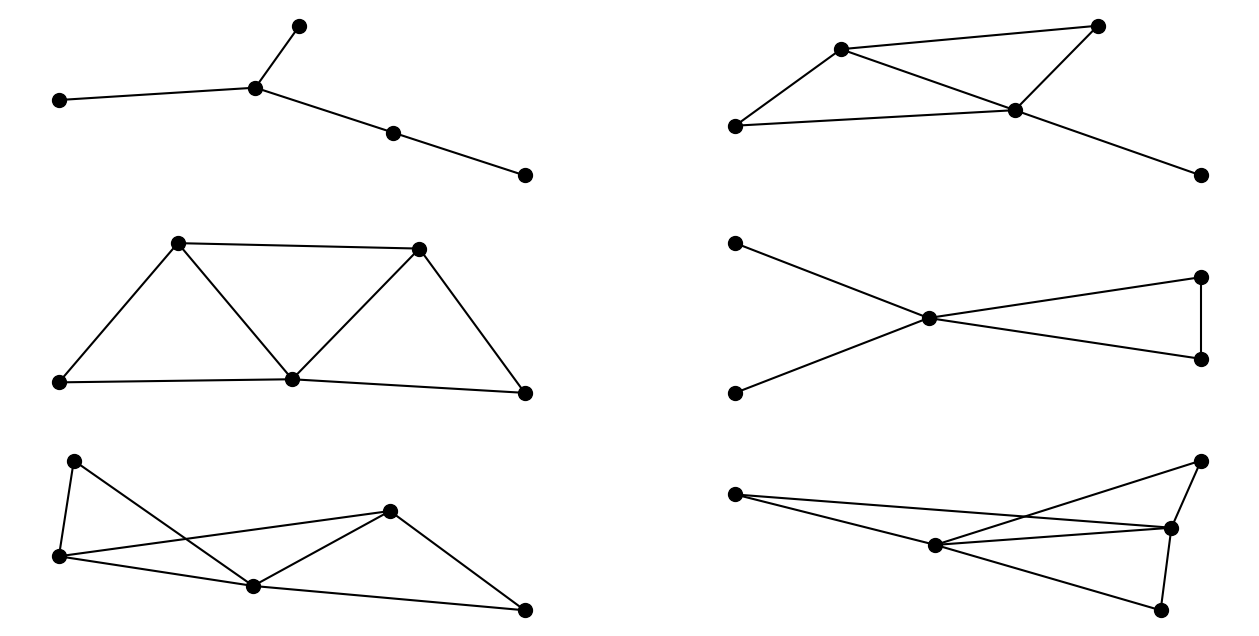

In [9]:
G = nx.binomial_graph(6,0.5)
deck_G = deck(G)
draw_graph(G)
draw_deck(deck_G)

**Ejemplo**. Considere la gráfica $G = K_3 \cup k K_1$. Esta **no** es reconstruible por aristas. Sea $H = K_{1,3} \cup (k-1)K_1$. Entonces $H$ es una reconstrucción por aristas de $G$, pero no es isomorfa a $G$.  

Gráfica G:


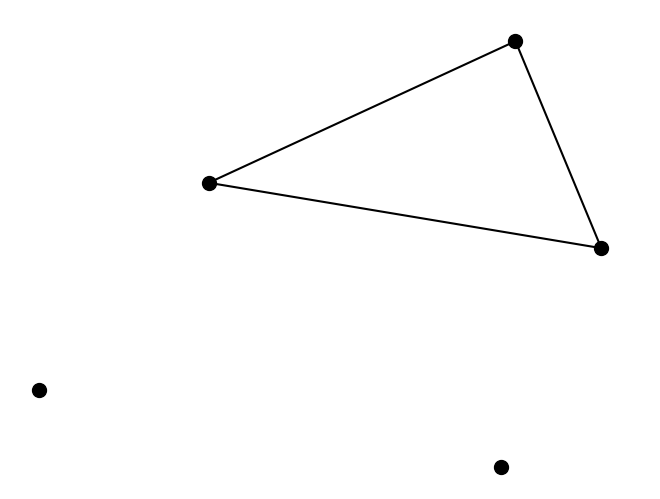

Deck por aristas de G:


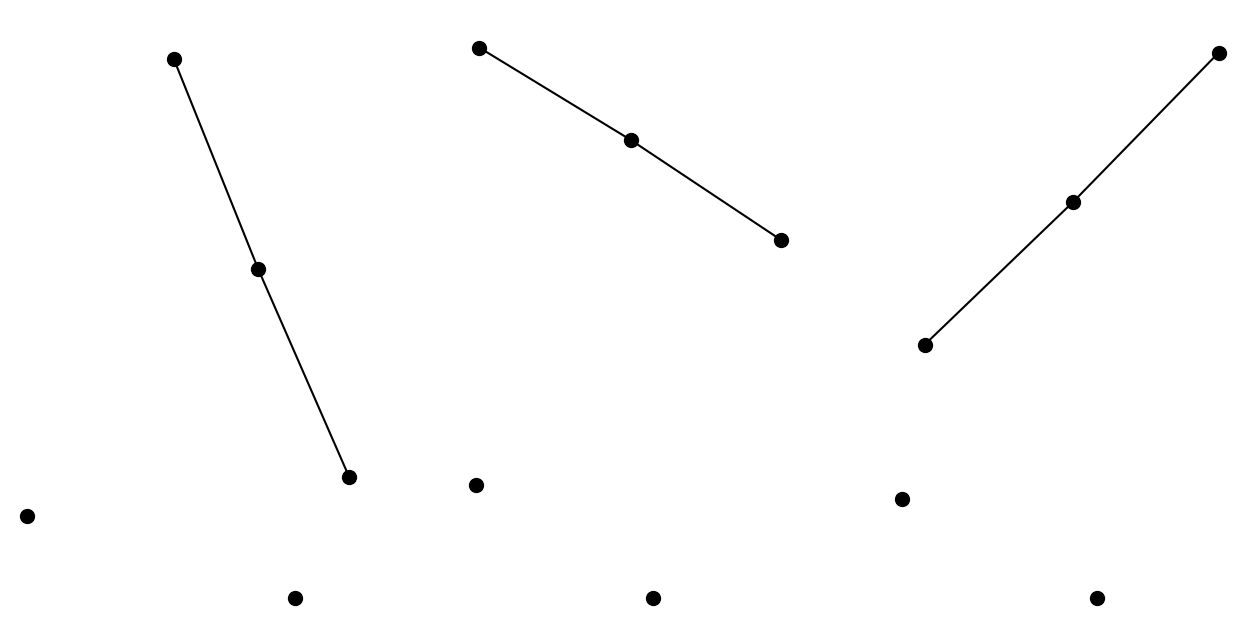

In [10]:
twoK_1 = nx.Graph()
twoK_1.add_nodes_from(list('ab'))

G = nx.union(nx.complete_graph(3), twoK_1)
edge_deck_G = edge_deck(G)
print('Gráfica G:')
draw_graph(G)
print('Deck por aristas de G:')
draw_deck(edge_deck_G)

Gráfica H:


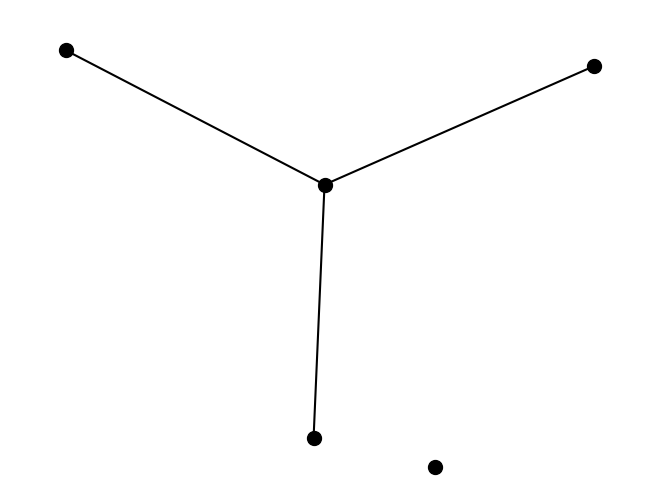

Deck por aristas de H:


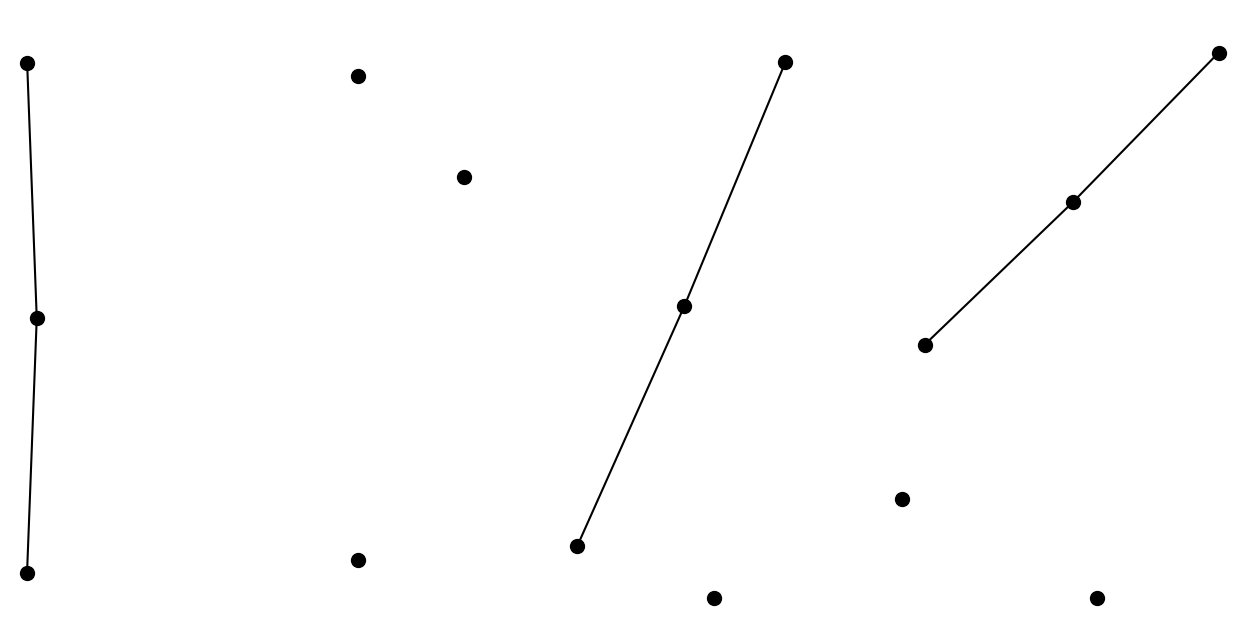

In [11]:
K_1 = nx.Graph()
K_1.add_nodes_from('a')

H = nx.union(nx.star_graph(3), K_1)
edge_deck_H = edge_deck(H)
print('Gráfica H:')
draw_graph(H)
print('Deck por aristas de H:')
draw_deck(edge_deck_H)

**Ejemplo:** Considere la gráfica $G = 2 K_2$. Esta no es reconstruible por aristas, pues la gráfica $H = P_3 \cup K_1$ tiene el mismo deck con $G$.  

Gráfica G:


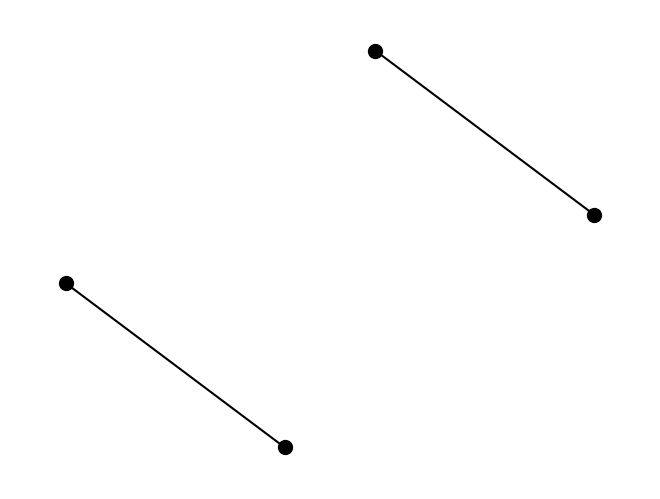

Deck por aristas de G:


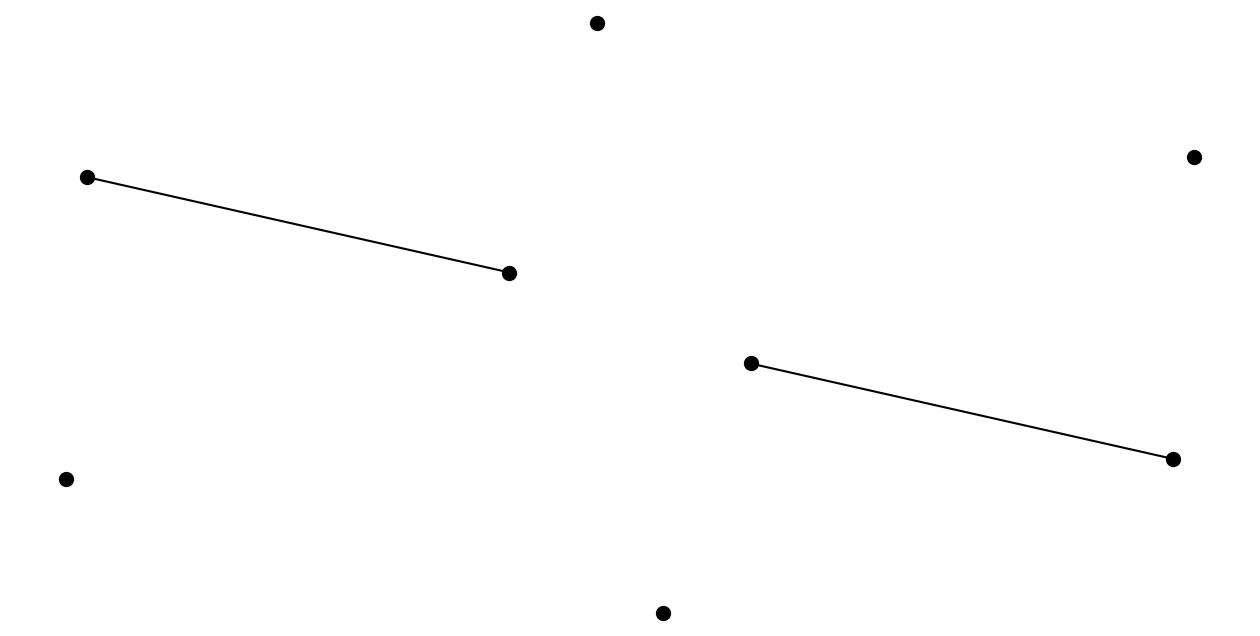

In [12]:
G = nx.Graph()
G.add_nodes_from(list(range(4)))
G.add_edges_from([(0,1), (2,3)])
edge_deck_G = edge_deck(G)
print('Gráfica G:')
draw_graph(G)
print('Deck por aristas de G:')
draw_deck(edge_deck_G)

Gráfica H:


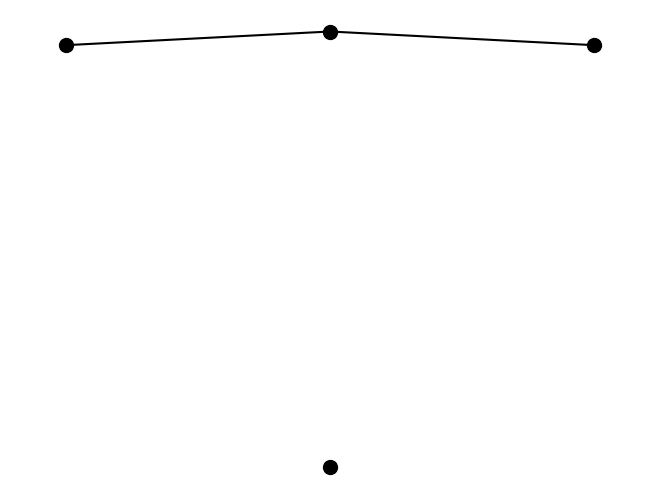

Deck por aristas de H:


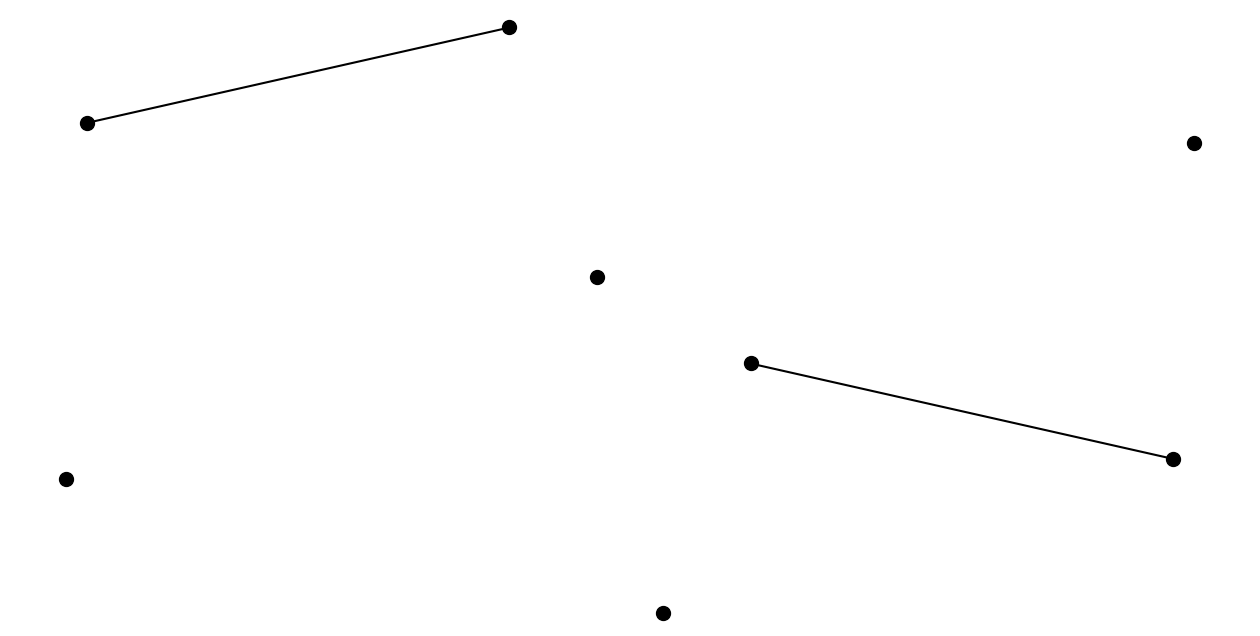

In [13]:
H = nx.Graph()
H.add_nodes_from(list(range(4)))
H.add_edges_from([(0,1), (1,2)])
edge_deck_H = edge_deck(H)
print('Gráfica H:')
draw_graph(H)
print('Deck por aristas de H:')
draw_deck(edge_deck_H)

**Conjetura de Reconstrucción por Aristas.** Toda gráfica en al menos cuatro aristas es reconstruible por aristas. 

¿Cuál conjetura es más fácil?
- Note que general perdemos más _información_ de $G$ al momento de borrar vértices que cuando borramos aristas. 
- Bajo esta perspectiva, intuitivamente podemos esperar que la conjetura de reconstrucción por aristas es más fácil de resolver que la conjetura de reconstrucción.
- De hecho, se puede demostrar (Teorema 8.8) que la conjetura de reconstrucción implica la conjetura de reconstrucción por aristas. 

La dificultad principal del problema de reconstrucción yace en las simetrías de $G$.
- Si los vértices de $G$ están _etiquetados_ y el deck conserva la etiquetación, entonces el problema es fácil de resolver.
- El grupo $Aut(G)$ juega un papel importante en la reconstrucción por aristas de $G$. 
- Si $G$ y $H$ tienen el mismo deck, entonces podemos definir un mapeo (_hipomorfismo_) biyectivo $\Phi: V(G) \rightarrow V(H)$ tal que $G - v$ es isomorfo a $H - \Phi(v)$, para todo $v \in V(G)$.
    - La conjetura de reconstrucción implica que si existe tal mapeo, entonces existe un isomorfismo entre $G$ y $H$.
    - No siempre se tiene que hipomorfismo $\Rightarrow$ isomorfismo.
    

**Ejemplo:**
> For example, if both $G$ and $H$ are vertex-transitive, then all $G − v$ and $H − w$ are isomorphic, therefore any bijection from $V(G)$ to $V(H)$ is a hypomorhism, but of course, not all can be isomorphisms, unless $G$ is the complete graph or its complement.

Si la gráfica está etiquetada y el deck hereda la etiquetación, la reconstrucción por aristas es fácil:
1. Escoja cualesquiera tres gráficas en $\mathcal{ED}(G)$, digamos $G_1, G_2$ y $G_3$.
2. Defina a $H$ como la gráfica con el conjunto de vértices que $V(G_i)$ y conjunto de aristas $E(V_1) \cup E(V_2) \cup E(V_3)$.
3. La gráfica $H$ es una reconstrucción por aristas de $G$.

In [14]:
def unique(l):
    if len(l) < 2:
        return l
    else:
        el = l[0]
        tmp = [val for val in l if val != el]
        return [el] + unique(tmp)


def recon(deck):
    nodes = list(deck[0].nodes)
    edges = unique(list(deck[0].edges) + list(deck[1].edges) +
                   list(deck[2].edges))
    H = nx.Graph()
    H.add_nodes_from(nodes)
    H.add_edges_from(edges)
    return H

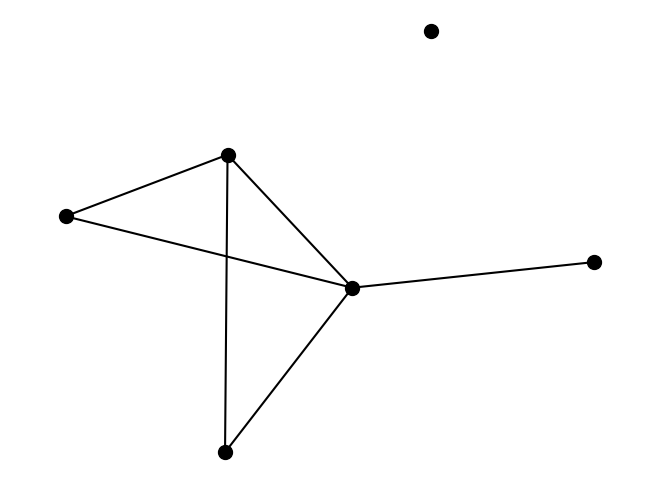

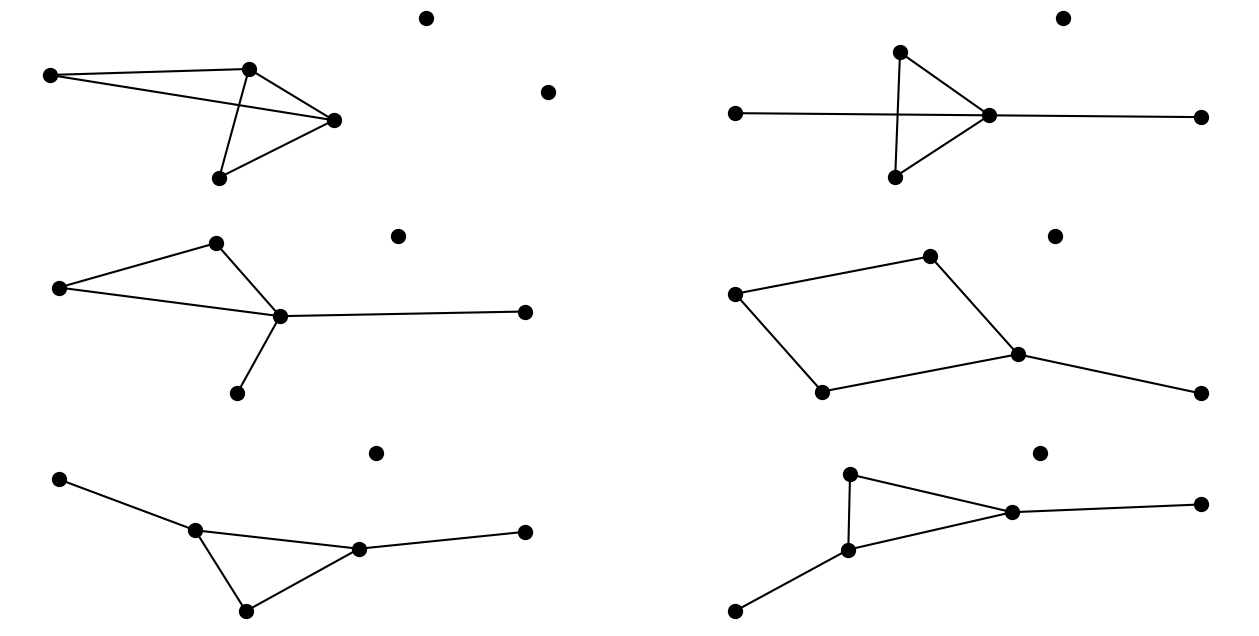

In [15]:
G = nx.binomial_graph(6,0.5)
edge_deck_G = edge_deck(G)
draw_graph(G)
draw_deck(edge_deck_G)

Gráfica original G


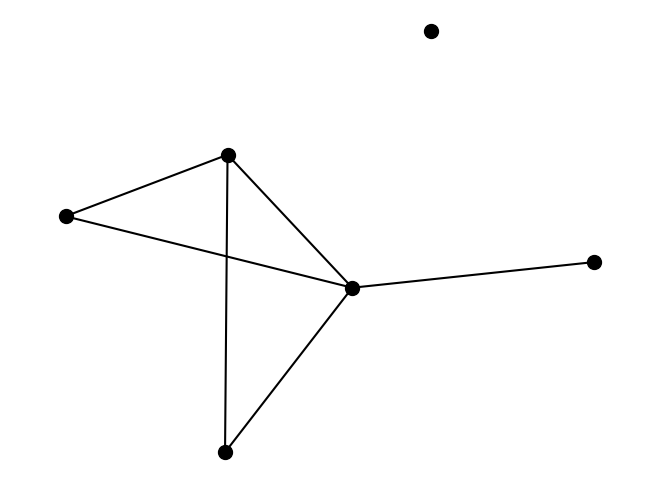

Gráfica reconstruida por el deck de G


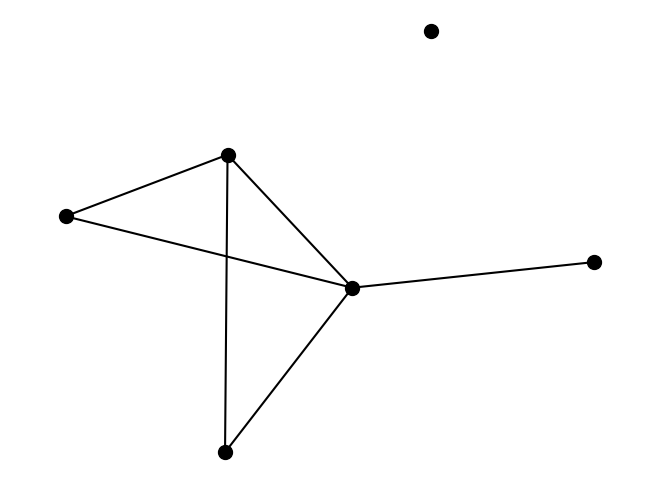

In [16]:
H = recon(edge_deck_G)
print('Gráfica original G')
draw_graph(G)
print('Gráfica reconstruida por el deck de G')
draw_graph(H)

* Dado que las conjeturas son difíciles de resolver, la mayoría de los resultados se han enfocado en determinar qué _parámetros_ son reconstruibles. 

* Decimos que un parámetro $\theta = \theta(G)$ es reconstruible si, para toda reconstrucción $H$ de $G$, se tiene que $\theta(H) = \theta(G)$. 

* Decimos que una clase $\mathcal C$ de gráficas es reconstruible si toda gráfica en $\mathcal C$ es reconstruible. 

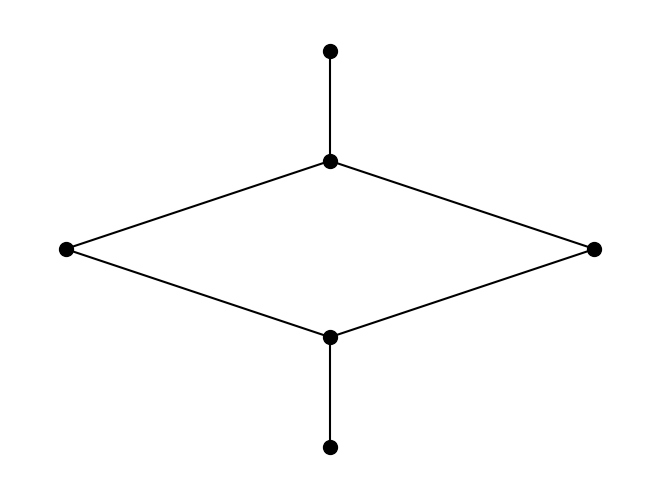

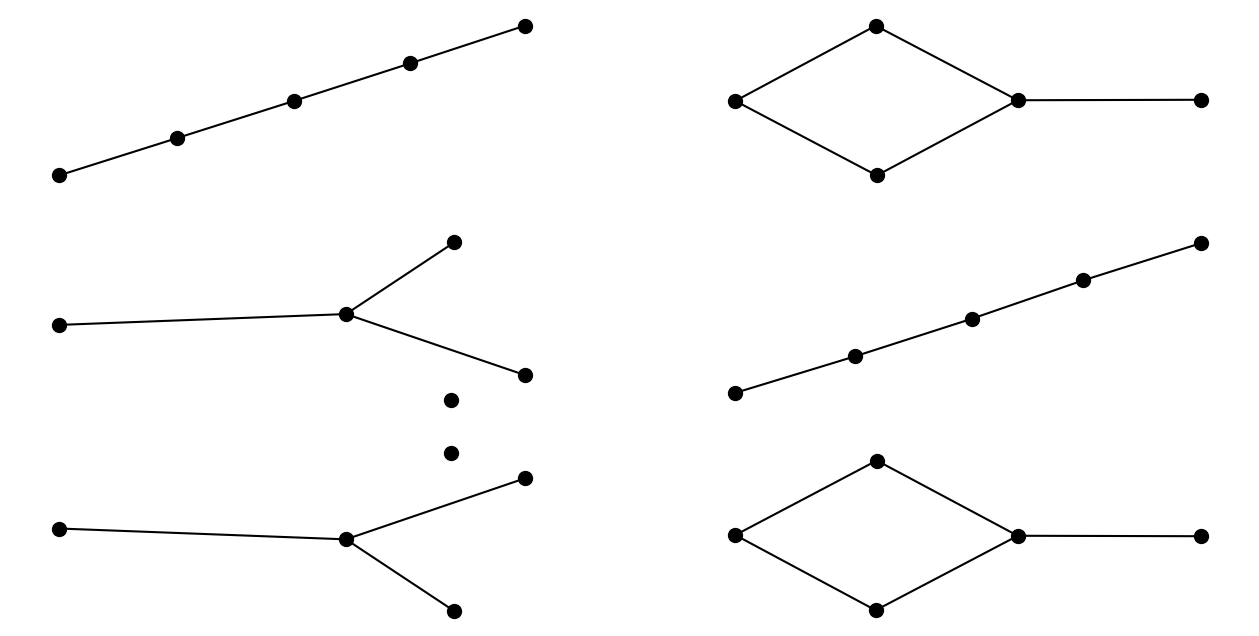

In [17]:
G = nx.binomial_graph(6,0.5)
deck_G = deck(G)
draw_graph(G)
draw_deck(deck_G)

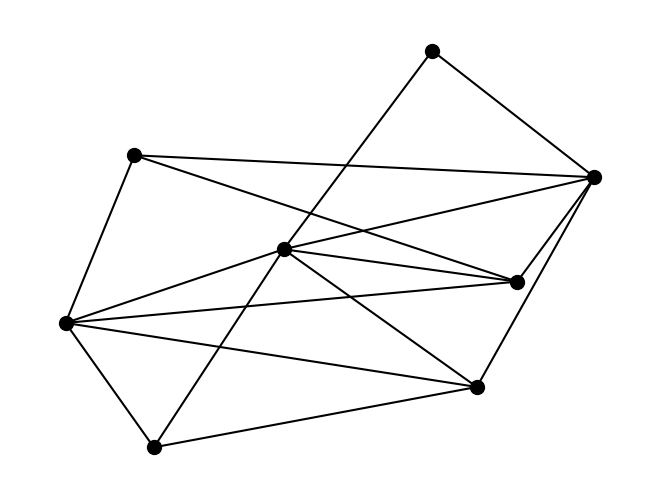

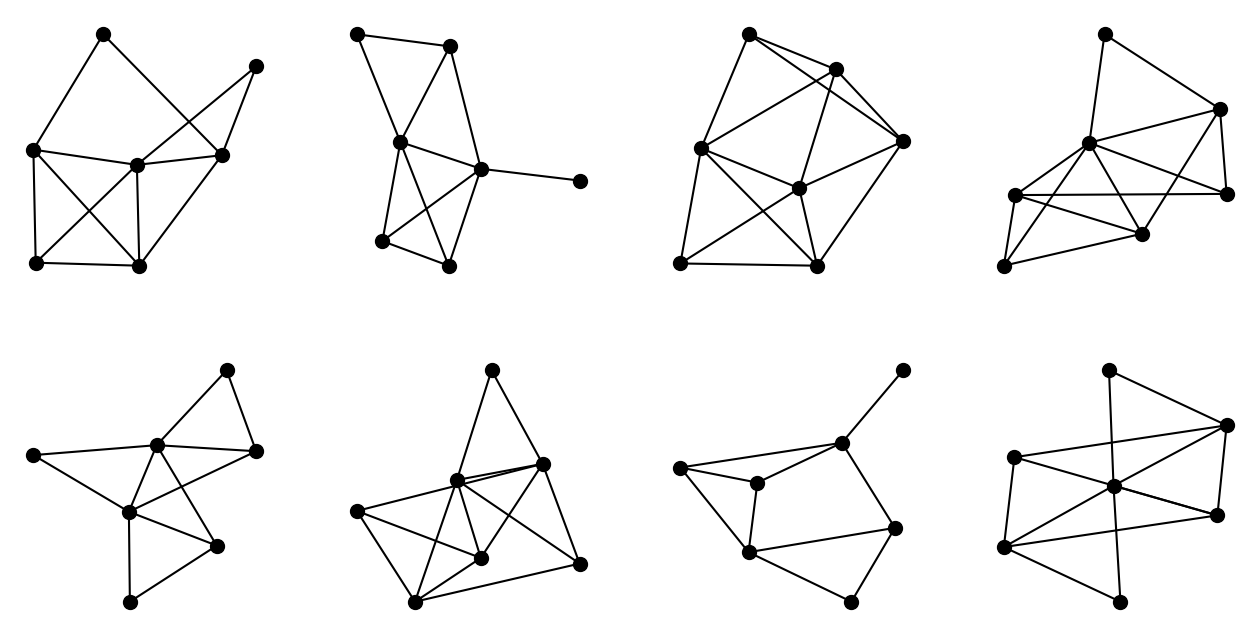

In [20]:
G = nx.binomial_graph(8,0.5)
deck_G = deck(G)
draw_graph(G)
draw_deck(deck_G)